In [2]:
import torch 
# import pandas
import matplotlib.pyplot as plt
import torchvision as vision
from torchvision import datasets, transforms
from matplotlib.patches import Circle
from PIL import Image
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights
import os
print("Testing world")

Testing world


Below is the script to generate the dataset. This dataset originates from the VOC2007 image classification dataset, taking 5011 images as testing images.  
The process of curating the dataset is as follows:
- Take each image and split them 

In [19]:


TRAIN_DATA_PATH = "Dataset/VOCdevkit/VOC2007/JPEGImages/"
# transform = transforms.Compose([transforms.Resize(255),
#                                  transforms.CenterCrop(224),
#                                  transforms.ToTensor()])

# transform = transforms.Compose([transforms.Resize(255),
#                                  transforms.CenterCrop(224)])

transform = transforms.Compose([])

train_dataset = datasets.ImageFolder(TRAIN_DATA_PATH, transform=transform)
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

print(len(train_dataset))
img, lab = train_dataset[5]
img1, lab1 = train_dataset[1]

print(img)
print(lab)
# images, labels = next(iter(dataloader))
# print(type(images))

# fig = px.imshow(img)
# fig.show()

fig=plt.figure()
fig.set_size_inches(1,1)
p=fig.add_subplot()

p.set_title(str(lab))
p.axes.get_xaxis().set_visible(False)
p.axes.get_yaxis().set_visible(False)
plt.imshow(img)

fig=plt.figure()
fig.set_size_inches(1,1)
p=fig.add_subplot()

p.set_title(str(lab1))
p.axes.get_xaxis().set_visible(False)
p.axes.get_yaxis().set_visible(False)
plt.imshow(img1)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Dataset/VOCdevkit/VOC2007/JPEGImages/'

In [ ]:
##Putting these images into AlexNet to determine best one
from torchvision import models

In [ ]:
#Downloading the weights for the network
alexnet = models.alexnet(pretrained=True)
alexnet

d:\Programming\programs\miniconda3\envs\Dissertation\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Programming\programs\miniconda3\envs\Dissertation\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
transformAlex = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225]
    )
])

with open('voc_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]
# print("Number of classes: {}".format(len(classes)))
# classes

photoIndex = 0
# for photo in photoList:
#   photoIndex += 1
#   print(photoIndex)
img_t = transformAlex(photoList[6])
img_t.shape

batch_t = torch.unsqueeze(img_t,0)

alexnet.eval()

out = alexnet(batch_t)
out.shape

_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:10]]





[('harvester, reaper', 12.408656120300293),
 ('plow, plough', 9.104186058044434),
 ('thresher, thrasher, threshing machine', 7.001903533935547),
 ('lawn mower, mower', 6.050253391265869),
 ('bow', 3.918287992477417),
 ('croquet ball', 3.6960620880126953),
 ('bicycle-built-for-two, tandem bicycle, tandem', 2.8682188987731934),
 ('swing', 2.7690558433532715),
 ('tractor', 1.8744053840637207),
 ('golfcart, golf cart', 1.5707393884658813)]

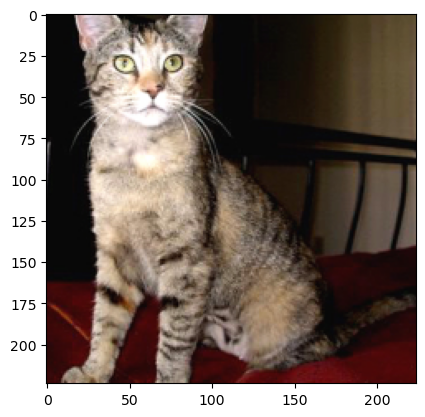

In [3]:
#Getting Cat images
TRAIN_DATA_PATH = "PetImages/CatUnlabelled/"
# transform = transforms.Compose([transforms.Resize(255),
#                                  transforms.CenterCrop(224),
#                                 #  transforms.ToTensor()])

transform = transforms.Compose([transforms.Resize(255), transforms.CenterCrop(224)])

# transform = transforms.Compose([])

train_dataset = datasets.ImageFolder(TRAIN_DATA_PATH, transform=transform)
# dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

# print(len(train_dataset))
img, lab = train_dataset[5]
# print(img.shape, lab)
plt.imshow(img)
# img1, lab1 = train_dataset[6]
# plt.imshow(img1)


In [4]:
def guessImage(img):
    # Step 1: Initialize model with the best available weights
    weights = ResNet50_Weights.DEFAULT
    model = resnet50(weights=weights)
    model.eval()

    # Step 2: Initialize the inference transforms
    preprocess = weights.transforms()

    # Step 3: Apply inference preprocessing transforms
    batch = preprocess(img).unsqueeze(0)

    # Step 4: Use the model and print the predicted category
    prediction = model(batch).squeeze(0).softmax(0)
    class_id = prediction.argmax().item()
    score = prediction[class_id].item()
    category_name = weights.meta["categories"][class_id]
    # print(f"{category_name}: {100 * score:.1f}%")
    return category_name, 100 * score

def createCrops(img):
    zoomList = []
    zoomList.append(img)
    # Creating cropped versions of images 
    # Nine 2x2 crops
    # for x in range (0,3):
    #     for y in range(0,3):
    #         xLeft = y*gridX
    #         xRight = (y+2)*gridX
    #         yTop = x*gridY
    #         yBottom = (x+2)*gridY
    #         im = img.crop((xLeft, yTop, xRight, yBottom))

    #         # fig=plt.figure()
    #         # fig.set_size_inches(1,1)
    #         # p=fig.add_subplot()
    #         index += 1
    #         # title = "Image " + str(index)
    #         # p.set_title(title)
    #         # p.axes.get_xaxis().set_visible(False)
    #         # p.axes.get_yaxis().set_visible(False)
    #         # plt.imshow(im)
    #         zoomList.append(im)

    # # Four 3x3 crops
    # for x in range (0,2):
    #     for y in range(0,2):
    #         # print("Working")
    #         xLeft = y*gridX
    #         xRight = (y+3)*gridX
    #         yTop = x*gridY
    #         yBottom = (x+3)*gridY
    #         im = img.crop((xLeft, yTop, xRight, yBottom))

    #         # fig=plt.figure()
    #         # fig.set_size_inches(1,1)
    #         # p=fig.add_subplot()
    #         index += 1
    #         # title = "Image " + str(index)
    #         # p.set_title(title)
    #         # p.axes.get_xaxis().set_visible(False)
    #         # p.axes.get_yaxis().set_visible(False)
    #         # plt.imshow(im)
    #         zoomList.append(im)

    (x1,y1,x2,y2) = img.getbbox()
    # Nine cropped images
    box_width = x2 / 3
    box_height = y2 / 3
    index = 0
    for x in range(0,3):
        for y in range(0,3):
            left= x * box_width
            right = (x+1) * box_width
            top = y * box_height
            bot = (y+1) * box_height
            im = img.crop((left, top, right,bot))

            # fig=plt.figure()
            # fig.set_size_inches(1,1)
            # p=fig.add_subplot()
            # index += 1
            # title = "Image " + str(index)
            # p.set_title(title)
            # p.axes.get_xaxis().set_visible(False)
            # p.axes.get_yaxis().set_visible(False)
            # plt.imshow(im)
            zoomList.append(im)
    return zoomList


def determineOptimalZoom(dataset):
    img, lab = train_dataset[0]
    index = 1
    
    with open('cat_labels.txt') as f:
        classes = [line.strip() for line in f.readlines()]
        # print(classes)

    for i in range(0, len(dataset)):
        startingIndex = index
        
        img, label = dataset[i]
        zoomList = createCrops(img)

        # Determining the optimal crop
        index += 1
        dispIndex = startingIndex
        topScore = -1
        topIndex = -1
        topFound = False
        for image in zoomList:
            # print(dispIndex)
            category_name, score = guessImage(image)
            cat_label = False
            if category_name in classes:
                cat_label = True
            if cat_label and score > topScore:
                topScore = score
                topIndex = dispIndex
                topFound = True
            imageLabel = "PetImages/RevisitedCat/" + str(dispIndex) + ".jpg"
            image.save(imageLabel)
            index += 1
            dispIndex += 1
        
        print("Top Score ", topScore, " Index ", topIndex)
        topLabel = "PetImages/RevisitedCat/" + str(topIndex) + ".jpg"
        rightLabel = "PetImages/RevisitedCat/" + str(topIndex) + "R.jpg"
        # print("Current top label" + str(topIndex))
        if topFound:
            os.rename(topLabel, rightLabel)
        

# determineOptimalZoom(train_dataset)


# Creating test set without labels
TEST_DATA_PATH = "PetImages/TestCat/"
test_dataset = datasets.ImageFolder(TEST_DATA_PATH, transform=transform)
print(len(test_dataset))
for i in range (0, len(test_dataset)):
    j = 0
    img, lab = test_dataset[i]
    zoomList = createCrops(img)
    for j in range (0, len(zoomList)):
        image = zoomList[j]
        name = "PetImages/TestCropped/" + str(i) + "_"+str(j)+".jpg"
        image.save(name)


200


: 

In [30]:
import os
import shutil

src_path = "PetImages/RevisitedCat"
dest_correct = "PetImages/RevisitedTraining/Correct"
dest_incorrect = "PetImages/RevisitedTraining/Incorrect"

for f in os.listdir(src_path):
    if str(f).endswith("R.jpg"):
        shutil.copy(os.path.join(src_path, f), dest_correct)
    else:
        shutil.copy(os.path.join(src_path, f), dest_incorrect)
